In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Comparison between Sentiment Values

We do a quick comparison between the sentiment values of the three sentiment analyzers used so far (OpenAI, prebuilt Roberta, FinVADER). Let's look for differences betwen them, and try to get an eyeball picture of which is the most accurate so far. 

To be included later: Roberta model finetuned on the OpenAI scores

## Preliminaries 

We load in the files and check the agreement between the different scores match previously computed values

In [2]:
openai = pd.read_csv('../sentiment_analysis/news_openai_final.csv')
roberta = pd.read_csv('../data/prebuilt_rob_sentiment.csv')
openai['Publishing Time'] = pd.to_datetime(openai['Publishing Time'])
roberta['Publishing Time'] = pd.to_datetime(roberta['Publishing Time'])

In [3]:
roberta = roberta[roberta['Publishing Time'].notna()]
relevant_cols = ['Publishing Time', 'Ticker', 'Sector','Source', 'Headline',
       'Text', 'rob_sentiment', 'fin_sentiment']
roberta = roberta[relevant_cols]

In [4]:
openai.head()


,Publishing Time,Ticker,Sector,Source,Headline,Text,openai_sentiment,openai_score
0,2019-03-15 10:46:42+00:00,WFC,Finance,The Motley Fool,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,-1.0,-0.50
1,2019-03-15 10:47:26+00:00,AAPL,Technology,The Motley Fool,Don't Underestimate Apple's iPhone Business,The segment is an invaluable asset to Apple's ...,1.0,0.75
2,2019-03-15 11:33:00+00:00,MA,Finance,Forbes,A Closer Look At Mastercard's Key Value Drivers,Mastercard has consistently beat street estima...,1.0,0.80
3,2019-03-15 11:52:45+00:00,BAC,Finance,Benzinga,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",1.0,0.50
4,2019-03-15 13:29:39+00:00,GOOGL,Technology,Benzinga,Uber And Waymo Seeking Outside Funding For Aut...,Commercially viable autonomous vehicle (AV) te...,0.0,0.10


In [5]:
roberta.head()

,Publishing Time,Ticker,Sector,Source,Headline,Text,rob_sentiment,fin_sentiment
156,2019-03-15 13:29:39+00:00,GOOGL,Technology,Benzinga,Uber And Waymo Seeking Outside Funding For Aut...,Commercially viable autonomous vehicle (AV) te...,negative,negative
160,2019-03-15 11:52:45+00:00,BAC,Finance,Benzinga,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",neutral,neutral
161,2019-03-15 11:33:00+00:00,MA,Finance,Forbes,A Closer Look At Mastercard's Key Value Drivers,Mastercard has consistently beat street estima...,positive,positive
162,2019-03-15 10:47:26+00:00,AAPL,Technology,The Motley Fool,Don't Underestimate Apple's iPhone Business,The segment is an invaluable asset to Apple's ...,positive,neutral
164,2019-03-15 10:46:42+00:00,WFC,Finance,The Motley Fool,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,positive,positive


In [6]:
merge_cols = ['Publishing Time', 'Ticker', 'Sector','Source', 'Headline',
       'Text']
df = pd.merge(openai, roberta, on = merge_cols, how = 'outer')
df.head()

,Publishing Time,Ticker,Sector,Source,Headline,Text,openai_sentiment,openai_score,rob_sentiment,fin_sentiment
0,2019-03-15 10:46:42+00:00,WFC,Finance,The Motley Fool,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,-1.0,-0.50,positive,positive
1,2019-03-15 10:47:26+00:00,AAPL,Technology,The Motley Fool,Don't Underestimate Apple's iPhone Business,The segment is an invaluable asset to Apple's ...,1.0,0.75,positive,neutral
2,2019-03-15 11:33:00+00:00,MA,Finance,Forbes,A Closer Look At Mastercard's Key Value Drivers,Mastercard has consistently beat street estima...,1.0,0.80,positive,positive
3,2019-03-15 11:52:45+00:00,BAC,Finance,Benzinga,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",1.0,0.50,neutral,neutral
4,2019-03-15 13:29:39+00:00,GOOGL,Technology,Benzinga,Uber And Waymo Seeking Outside Funding For Aut...,Commercially viable autonomous vehicle (AV) te...,0.0,0.10,negative,negative


In [7]:
df = df.drop(columns = 'openai_score')
df.head()

,Publishing Time,Ticker,Sector,Source,Headline,Text,openai_sentiment,rob_sentiment,fin_sentiment
0,2019-03-15 10:46:42+00:00,WFC,Finance,The Motley Fool,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,-1.0,positive,positive
1,2019-03-15 10:47:26+00:00,AAPL,Technology,The Motley Fool,Don't Underestimate Apple's iPhone Business,The segment is an invaluable asset to Apple's ...,1.0,positive,neutral
2,2019-03-15 11:33:00+00:00,MA,Finance,Forbes,A Closer Look At Mastercard's Key Value Drivers,Mastercard has consistently beat street estima...,1.0,positive,positive
3,2019-03-15 11:52:45+00:00,BAC,Finance,Benzinga,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",1.0,neutral,neutral
4,2019-03-15 13:29:39+00:00,GOOGL,Technology,Benzinga,Uber And Waymo Seeking Outside Funding For Aut...,Commercially viable autonomous vehicle (AV) te...,0.0,negative,negative


In [8]:
df[df['openai_sentiment'].isna()]

,Publishing Time,Ticker,Sector,Source,Headline,Text,openai_sentiment,rob_sentiment,fin_sentiment


In [9]:
def sentiment_classifier(text:str):
    if text == 'positive':
        return 1
    elif text == 'negative':
        return -1
    else:
        return 0

In [10]:
df['rob_sentiment'] = df['rob_sentiment'].apply(sentiment_classifier)
df['fin_sentiment'] = df['fin_sentiment'].apply(sentiment_classifier)
df.head()

,Publishing Time,Ticker,Sector,Source,Headline,Text,openai_sentiment,rob_sentiment,fin_sentiment
0,2019-03-15 10:46:42+00:00,WFC,Finance,The Motley Fool,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,-1.0,1,1
1,2019-03-15 10:47:26+00:00,AAPL,Technology,The Motley Fool,Don't Underestimate Apple's iPhone Business,The segment is an invaluable asset to Apple's ...,1.0,1,0
2,2019-03-15 11:33:00+00:00,MA,Finance,Forbes,A Closer Look At Mastercard's Key Value Drivers,Mastercard has consistently beat street estima...,1.0,1,1
3,2019-03-15 11:52:45+00:00,BAC,Finance,Benzinga,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",1.0,0,0
4,2019-03-15 13:29:39+00:00,GOOGL,Technology,Benzinga,Uber And Waymo Seeking Outside Funding For Aut...,Commercially viable autonomous vehicle (AV) te...,0.0,-1,-1


In [11]:
openai_roberta = df[df['rob_sentiment'] != df['openai_sentiment']]
print(f'The amount of articles in openai_sentiment.csv is {len(openai)}')
print(f'The amount of articles in the prebuilt roberta csv is {len(roberta)}')
print(f'The amount of articles in the merged dataframe is {len(df)}')
print(f'The amount of articles after filtering when openAI and prebuilt roberta disagree is {len(openai_roberta)}')
print(f'openai disagrees with roberta on {100*len(openai_roberta)/len(df)}% of the articles')
openai_roberta.head()

The amount of articles in openai_sentiment.csv is 63703
The amount of articles in the prebuilt roberta csv is 63703
The amount of articles in the merged dataframe is 63703
The amount of articles after filtering when openAI and prebuilt roberta disagree is 25308
openai disagrees with roberta on 39.728113275669905% of the articles


,Publishing Time,Ticker,Sector,Source,Headline,Text,openai_sentiment,rob_sentiment,fin_sentiment
0,2019-03-15 10:46:42+00:00,WFC,Finance,The Motley Fool,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,-1.0,1,1
3,2019-03-15 11:52:45+00:00,BAC,Finance,Benzinga,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",1.0,0,0
4,2019-03-15 13:29:39+00:00,GOOGL,Technology,Benzinga,Uber And Waymo Seeking Outside Funding For Aut...,Commercially viable autonomous vehicle (AV) te...,0.0,-1,-1
8,2019-03-15 18:07:30+00:00,AMZN,Technology,Market Watch,The Ratings Game: Amazon stock gains after Key...,It’s now unanimous—100% of the analysts survey...,0.0,1,1
9,2019-03-15 18:14:02+00:00,GOOGL,Technology,CNBC,Experimental Google Maps feature puts arrows o...,CNBC tested Google Maps' new augmented reality...,1.0,0,1


In [12]:
openai_finvader = df[df['fin_sentiment'] != df['openai_sentiment']]
roberta_finvader = df[df['rob_sentiment'] != df['fin_sentiment']]
print(f'openai disagrees with finvader on {len(openai_finvader)/len(df)*100}% of articles')
print(f'roberta disagrees with finvader on {len(roberta_finvader)/len(df)*100}% of articles')



openai disagrees with finvader on 44.192581197117875% of articles
roberta disagrees with finvader on 43.0058239015431% of articles


In [13]:

print(len(roberta['Publishing Time'].unique()))
print(len(roberta))

62449
63703


The numbers here more or less agree with Jem's percentages. There is a minor difference, which I believe comes from the above non-uniqueness of Publishing Time. The percentages above should be the correct ones.

## Eye Test

We look at some articles and see how they are rated by the analyzers versus how we personally would rate them 

In [14]:
openai_roberta.head()

,Publishing Time,Ticker,Sector,Source,Headline,Text,openai_sentiment,rob_sentiment,fin_sentiment
0,2019-03-15 10:46:42+00:00,WFC,Finance,The Motley Fool,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,-1.0,1,1
3,2019-03-15 11:52:45+00:00,BAC,Finance,Benzinga,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",1.0,0,0
4,2019-03-15 13:29:39+00:00,GOOGL,Technology,Benzinga,Uber And Waymo Seeking Outside Funding For Aut...,Commercially viable autonomous vehicle (AV) te...,0.0,-1,-1
8,2019-03-15 18:07:30+00:00,AMZN,Technology,Market Watch,The Ratings Game: Amazon stock gains after Key...,It’s now unanimous—100% of the analysts survey...,0.0,1,1
9,2019-03-15 18:14:02+00:00,GOOGL,Technology,CNBC,Experimental Google Maps feature puts arrows o...,CNBC tested Google Maps' new augmented reality...,1.0,0,1


In [15]:
def read_article(x:int):
    print(openai_roberta['Headline'].iloc[x] + ' ' + openai_roberta['Text'].iloc[x])
    y = openai_roberta['openai_sentiment'].iloc[x]
    z =openai_roberta['rob_sentiment'].iloc[x]
    tick = openai_roberta['Ticker'].iloc[x]
    print(f'Ticker: {tick}')
    print(f'The openai score is {y}')
    print(f'The prebuild roberta score is {z}')


for any number up to 25308, can read the article and make your opinion on the difference in scores

In [16]:
read_article(24)

The Wall Street Journal: Google offers up Android concessions in bid to appease EU antitrust regulators Google plans to ask all Android smartphone users in Europe whether they want to switch to competing search engines or web browsers.
Ticker: GOOGL
The openai score is 0.0
The prebuild roberta score is 1


Personal Opinions: I do find myself agreeing with openai more than prebuild roberta, but it's not unanimous agreement from me. 

One thing that we have to keep in mind is that sentiment is subjective, and how we view the article depends on what perspective we want to see it from (e.g. articles that may talk about something good for consumers but bad for company margins may be viewed negatively from a stockholder, but positively from others). This influence is somewhat mitigated from the fact that we seletively picked articles from finance-oriented sites. 

One example is something like this is in article 24, regarding EU antitrust regulations and Google. 

## Stats

Let's look at some stats regarding the values. From above, it seems openai labels more articles as positive than prebuild_rob, and less as neutral. Let's confirm this with basic counts

First we look at differences, counting each type of change made

In [17]:
test1 = openai_roberta[openai_roberta['openai_sentiment'] == -1*openai_roberta['rob_sentiment']]
print(f'There are {len(test1)} articles where the neither score agreed or was neutral. That is {len(test1)*100/len(openai_roberta)}% for the articles differences.')

There are 2783 articles where the neither score agreed or was neutral. That is 10.996522838628103% for the articles differences.


In [18]:
test2 = openai_roberta[openai_roberta['openai_sentiment'] == 0]
print(f'openai gave {len(test2)} articles a neutral score when prebuilt_rob did not. This is {len(test2)*100/len(openai_roberta)}% of articles differences.')

openai gave 8142 articles a neutral score when prebuilt_rob did not. This is 32.17164532954007% of articles differences.


In [19]:
test3 = openai_roberta[openai_roberta['rob_sentiment']==0]
print(f'openai disagreed with prebuilt_rob\'s netural assessment for {len(test3)} articles, which is {100*len(test3)/len(openai_roberta)}% of the differences.')

openai disagreed with prebuilt_rob's netural assessment for 14383 articles, which is 56.831831831831835% of the differences.


In [20]:
neg_to_pos = test1[test1['openai_sentiment'] == -1]
pos_to_neg = test1[test1['openai_sentiment'] == 1]
pos_to_neu = test2[test2['rob_sentiment']==1]
neg_to_neu = test2[test2['rob_sentiment']==-1]
neu_to_pos = test3[test3['openai_sentiment']==1]
neu_to_neg = test3[test3['openai_sentiment']==-1]
print(f'neg to pos: {len(neg_to_pos)} \n pos to neg: {len(pos_to_neg)}\n pos to neu: {len(pos_to_neu)}')
print(f'neg to neu: {len(neg_to_neu)}\n neu to pos: {len(neu_to_pos)}\n neu to neg: {len(neu_to_neg)}')


neg to pos: 1318 
 pos to neg: 1465
 pos to neu: 4454
neg to neu: 3688
 neu to pos: 10767
 neu to neg: 3616


Here are total counts, which confirms openai is more positive and less likely to give a neutral score

In [21]:
openai_counts = pd.DataFrame(df['openai_sentiment'].value_counts())
openai_counts['percentage'] = openai_counts['count']/openai_counts['count'].sum()
openai_counts

,count,percentage
openai_sentiment,,
1.0,34290,0.538279
0.0,16501,0.259030
-1.0,12912,0.202691


In [22]:
roberta_counts = pd.DataFrame(df['rob_sentiment'].value_counts())
roberta_counts['percentage'] = roberta_counts['count']/roberta_counts['count'].sum()
roberta_counts

,count,percentage
rob_sentiment,,
1,27830,0.436871
0,22742,0.357000
-1,13131,0.206128


Let's create some Samson-esque graphs to see how the stock moves with respect to the sentiment values. Maybe we will uncover some related patterns. 

In [23]:
tickers = df['Ticker'].unique()
tickers

array(['WFC', 'AAPL', 'MA', 'BAC', 'GOOGL', 'AMZN', 'JPM', 'MSFT', 'V',
       'ABBV', 'NVDA', 'LLY', 'MRK', 'UNH', 'JNJ'], dtype=object)

In [24]:
rob_stock = pd.read_csv('../prebuilt_rob_data/AAPL_prerob.csv')
rob_stock[rob_stock['rob_sentiment'] == 'negative']


,Publishing Time,Ticker,Sector,Source,Headline,Text,URL,fin_sentiment,finvader_tot,rob_sentiment,rob_score,stock_time,open,high,low,close,volume,numtrades,vwap
0,2024-03-15 22:18:35+00:00,AAPL,Technology,The Guardian,Apple to pay $490m to settle claims it misled ...,Company denied that Tim Cook deceived investor...,https://www.theguardian.com/technology/2024/ma...,negative,-0.6772,negative,0.773549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,2019-03-19 22:01:30+00:00,AAPL,Technology,The Motley Fool,Revealed: The Key Metric Showing Apple Has Los...,Is it better to be an innovator or a tastemake...,https://www.fool.com/investing/2019/03/19/reve...,neutral,0.0900,negative,0.967033,2019-03-19 22:15:00+00:00,186.100,186.1500,186.08,186.12,9641.0,20.0,186.135487
176,2019-03-19 22:18:16+00:00,AAPL,Technology,The Motley Fool,Apple Has Another Huawei Problem,Apple's iPhone unit shipment woes could cause ...,https://www.fool.com/investing/2019/03/19/appl...,negative,-0.4570,negative,0.998527,2019-03-19 22:30:00+00:00,186.080,186.1200,186.08,186.08,1029.0,8.0,186.099660
207,2019-03-20 14:07:11+00:00,AAPL,Technology,24/7 Wall Street,Why Apple’s pitch to big newspapers is falling...,From Lucia Moses’ Apple is pitching its new su...,https://feedproxy.google.com/~r/typepad/RyNm/~...,negative,-0.1568,negative,0.997736,2019-03-20 14:15:00+00:00,186.050,187.1200,185.85,186.97,1174414.0,7306.0,186.528311
374,2019-03-25 11:17:26+00:00,AAPL,Technology,Market Watch,Apple streaming event 'could trigger a sell-of...,BTIG analyst Walt Piecyk wrote Monday that App...,https://feeds.marketwatch.com/~r/marketwatch/m...,neutral,0.0065,negative,0.997203,2019-03-25 11:30:00+00:00,190.300,190.4500,190.14,190.43,26111.0,210.0,190.321714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78768,2024-03-14 11:58:31+00:00,AAPL,Technology,InvestorPlace,Apple's Rotten Core: 3 Reasons to Dump AAPL St...,"The renowned iPhone maker, Apple (NASDAQ: AAPL...",https://investorplace.com/2024/03/apples-rotte...,negative,-0.6174,negative,0.998669,2024-03-14 12:00:00+00:00,172.250,172.5000,171.51,172.42,144120.0,3066.0,172.277931
78775,2024-03-14 13:33:13+00:00,AAPL,Technology,The Motley Fool,"Apple Stock Has 31% Upside, According to This ...","Despite the stock being down year to date, Ban...",https://www.fool.com/investing/2024/03/14/appl...,neutral,-0.0516,negative,0.805460,2024-03-14 13:45:00+00:00,172.805,173.2471,172.29,172.81,3283095.0,38585.0,172.780762
78830,2024-03-15 12:48:34+00:00,AAPL,Technology,Finbold,Sell Alert: Apple stock forms first Death Cros...,While far from the worst-performing S&P 500 st...,https://finbold.com/sell-alert-apple-stock-for...,negative,-0.7503,negative,0.936575,2024-03-15 13:00:00+00:00,173.650,173.6600,172.74,172.74,125736.0,2506.0,173.146401
78834,2024-03-15 13:57:00+00:00,AAPL,Technology,Barrons,Apple Stock Is Suffering From Worry Over AI. T...,The stock is missing out on the AI rally but t...,https://www.barrons.com/articles/apple-stock-a...,positive,0.3914,negative,0.802608,2024-03-15 14:00:00+00:00,171.440,171.6050,170.88,171.11,2662632.0,36382.0,171.183576


Here are the graphs associated with the prebuilt roberta scores. 

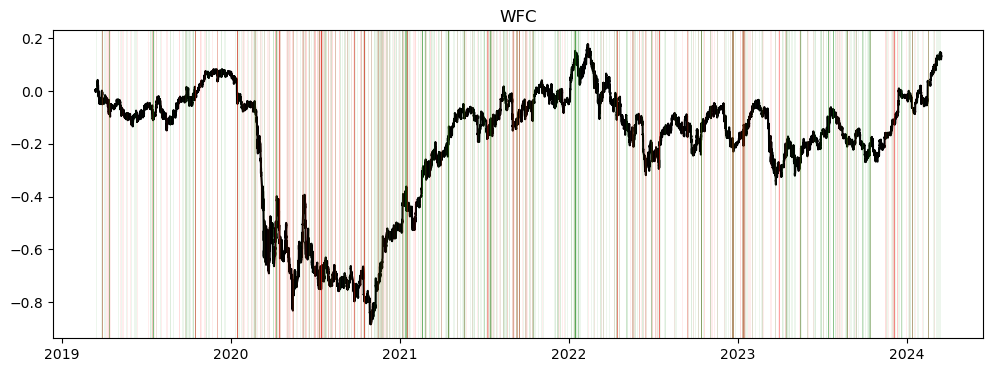

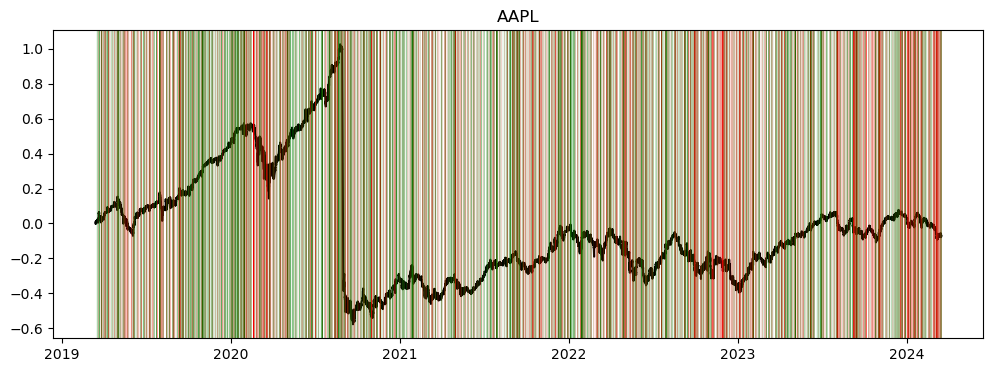

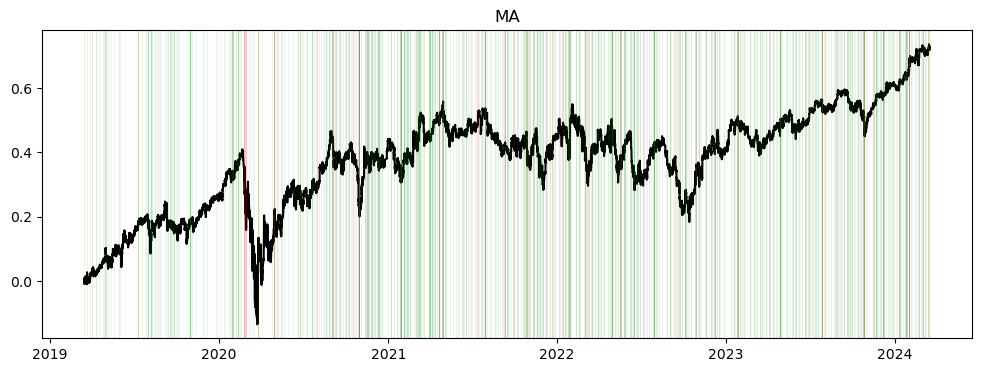

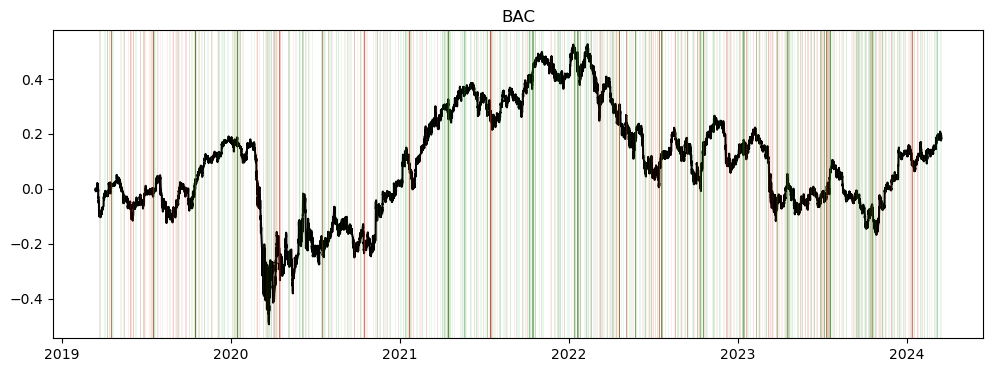

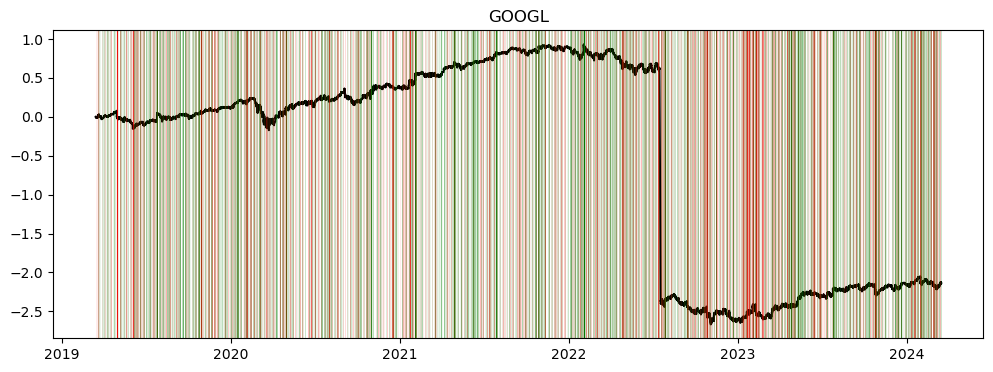

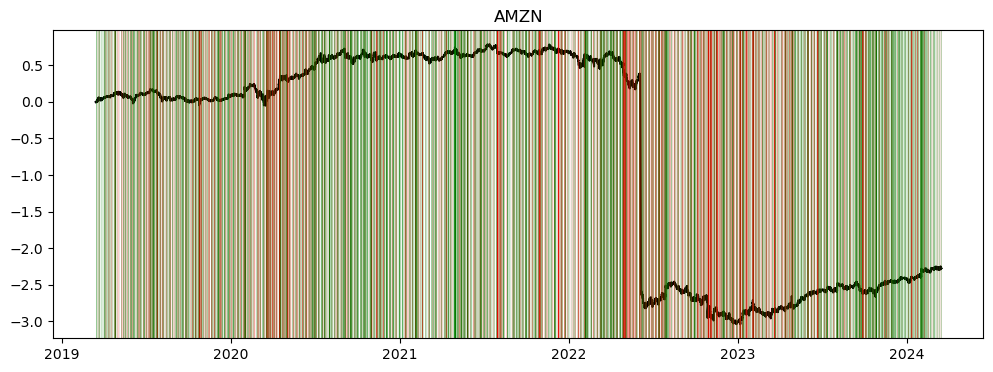

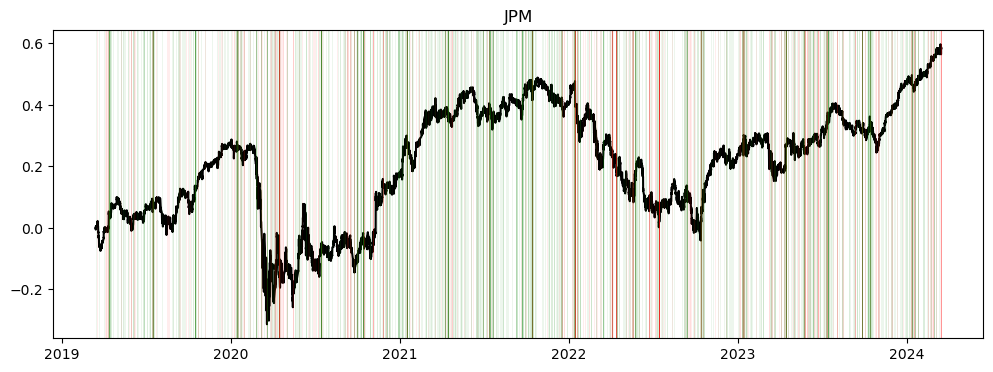

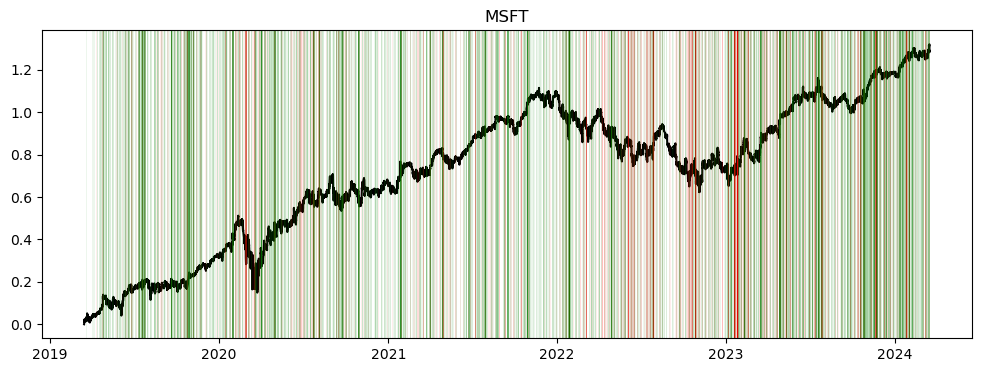

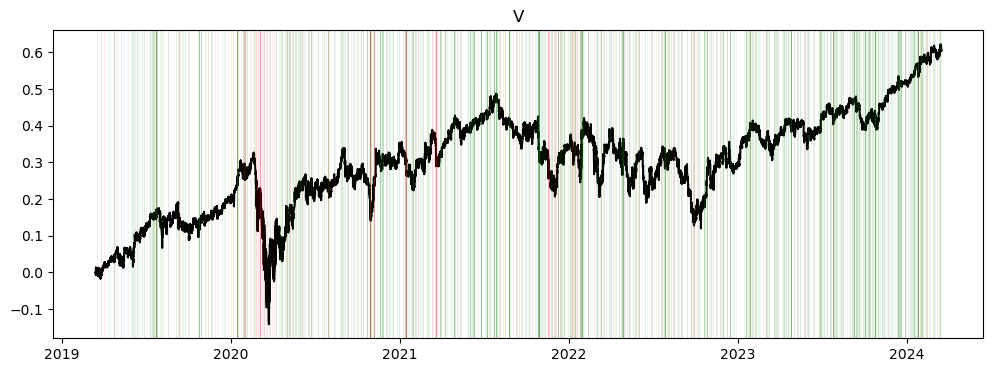

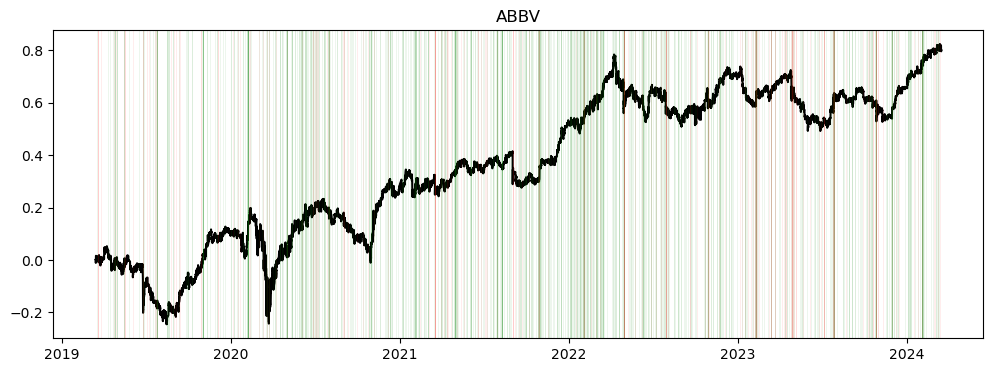

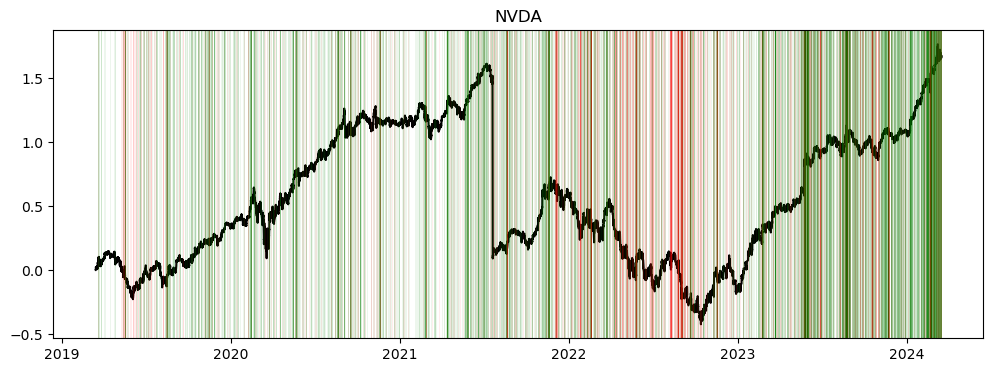

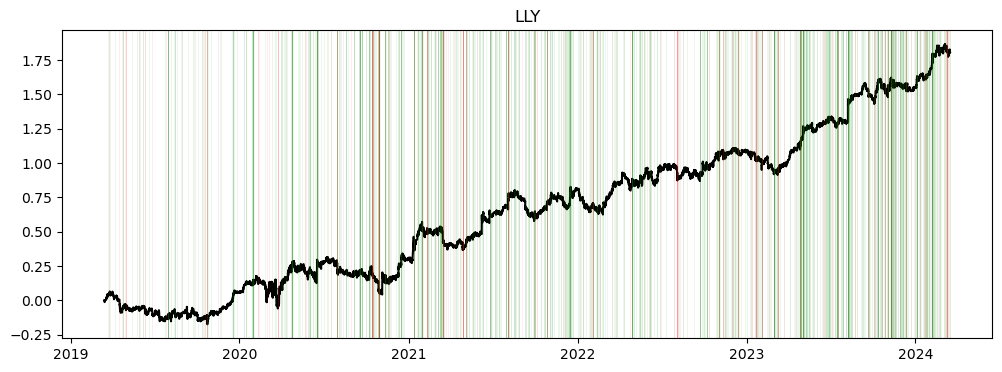

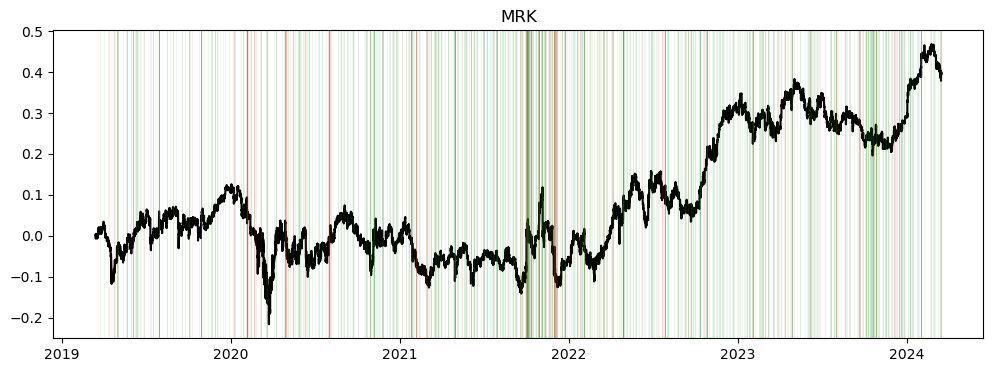

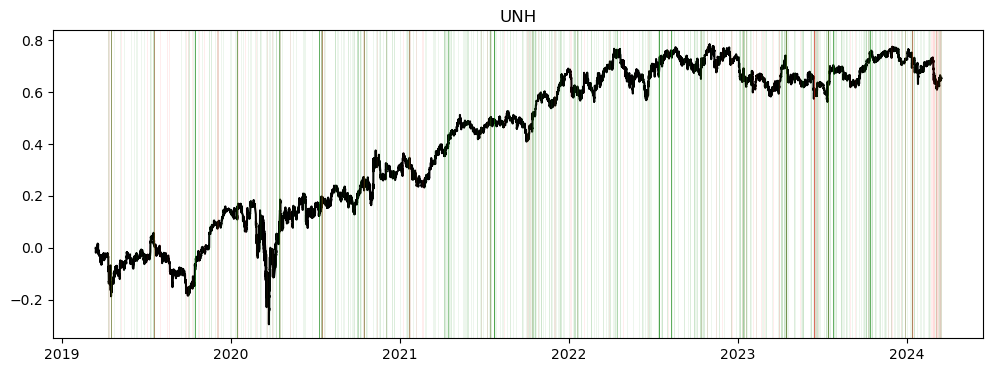

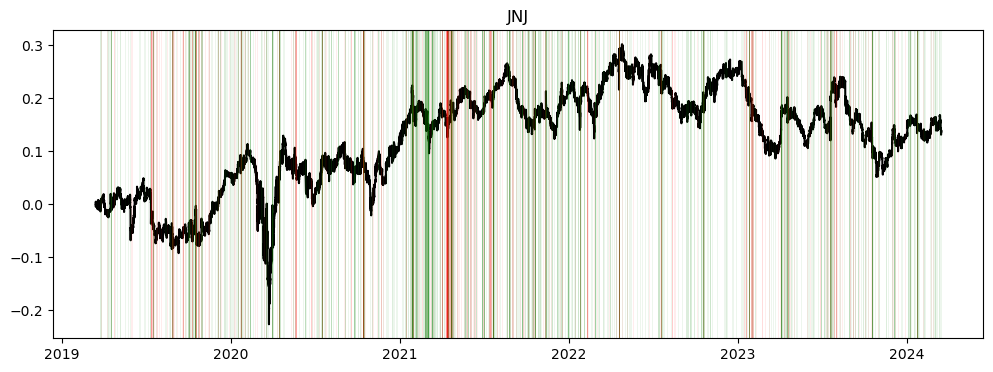

In [41]:

for tick in tickers:
    rob_stock = pd.read_csv('../prebuilt_rob_data/'+tick+'_prerob.csv')[['Publishing Time', 'rob_sentiment', 'stock_time', 'close', 'rob_score']]
    rob_stock = rob_stock[rob_stock['stock_time'].notna()]
    rob_stock['Publishing Time'] = pd.to_datetime(rob_stock['Publishing Time'])
    rob_stock['stock_time'] = pd.to_datetime(rob_stock['stock_time'])
    fig,ax = plt.subplots(figsize=(12,4))
    ax.plot(rob_stock['stock_time'],np.log(rob_stock['close'] / rob_stock['close'].iloc[0]), color = 'black')
    for index, row in rob_stock.iterrows():
        if row['rob_sentiment'] == 'negative':
            ax.axvline(row['Publishing Time'],color='r',linewidth=0.5, alpha = .1)
        if row['rob_sentiment'] == 'positive':
            ax.axvline(row['Publishing Time'],color='g',linewidth=0.5, alpha=.1)
        # if row['rob_sentiment'] == 'neutral':
        #     ax.axvline(row['Publishing Time'],color='blue',linewidth=0.5,alpha=.1)
    ax.set_title(f'{tick}')

    plt.show()

stock splits aside, its a bit hard to judge a pattern among the stocks with a significant amount of news articles just from the graphs. 

on the other hand, here are the openai score-related graphs

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


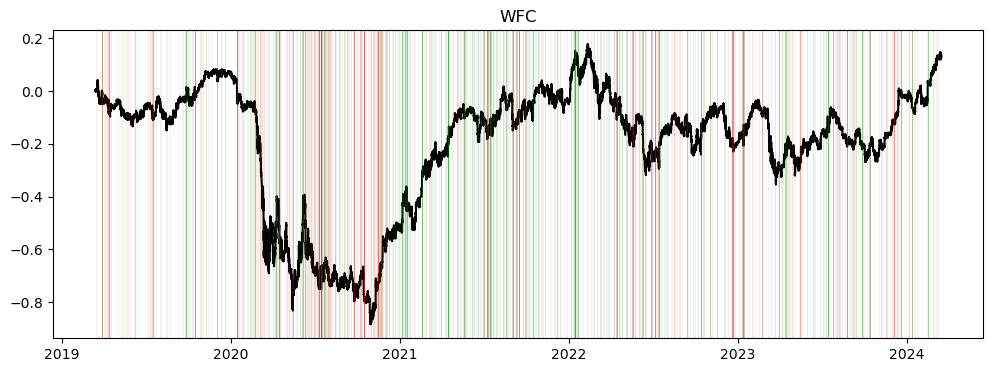

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


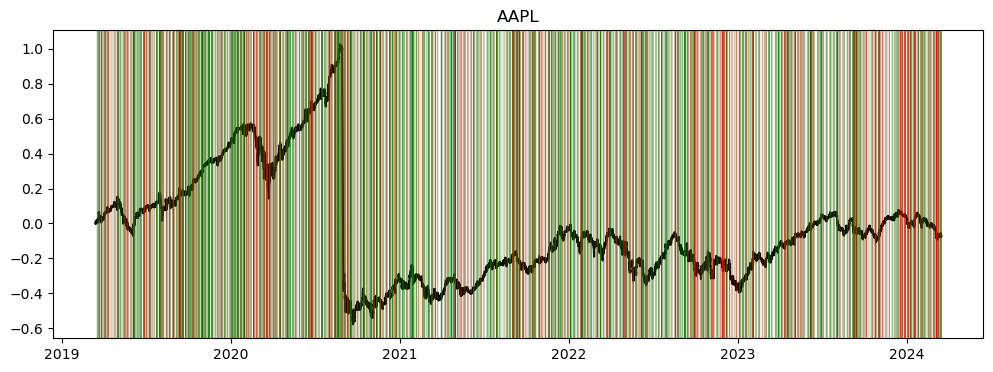

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


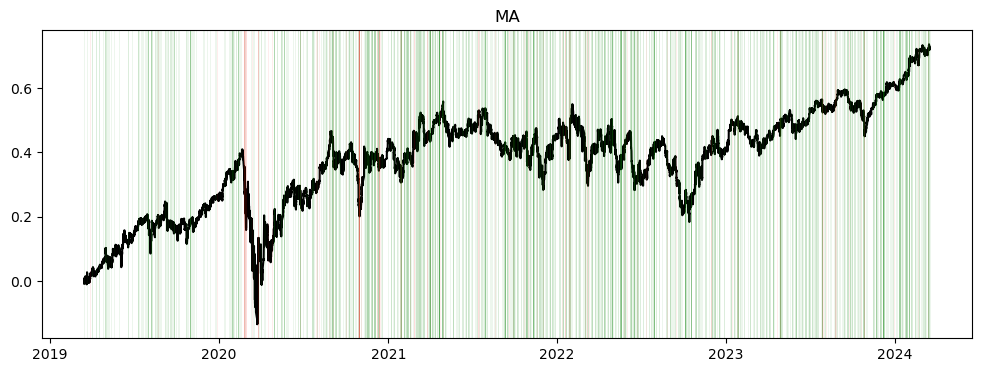

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


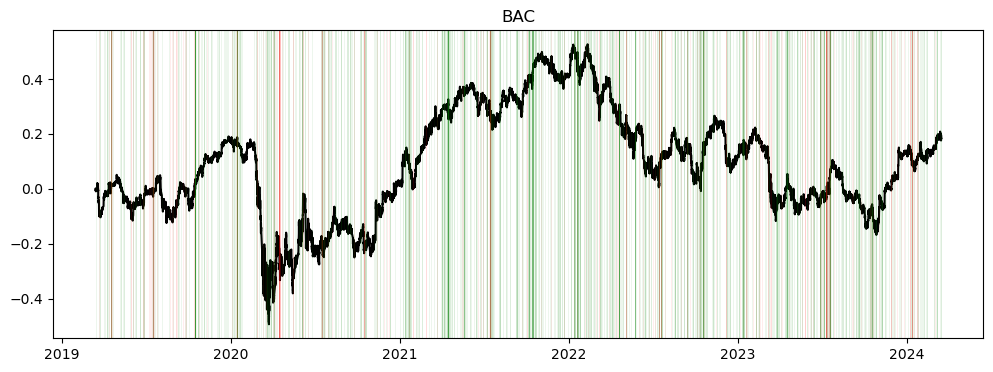

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


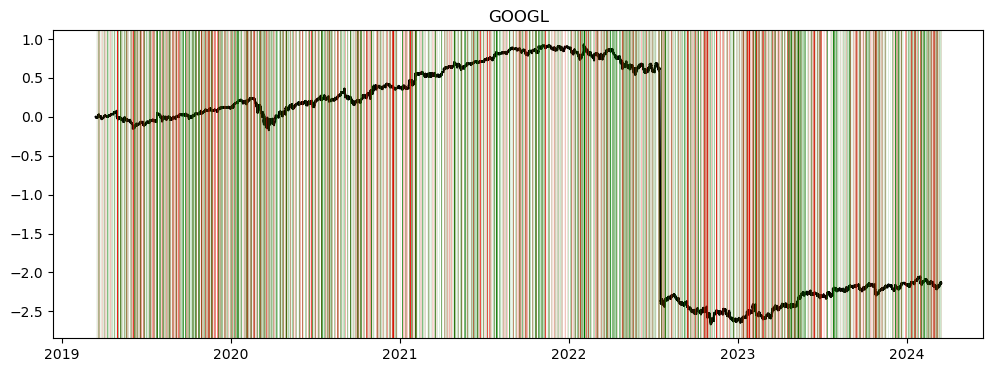

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


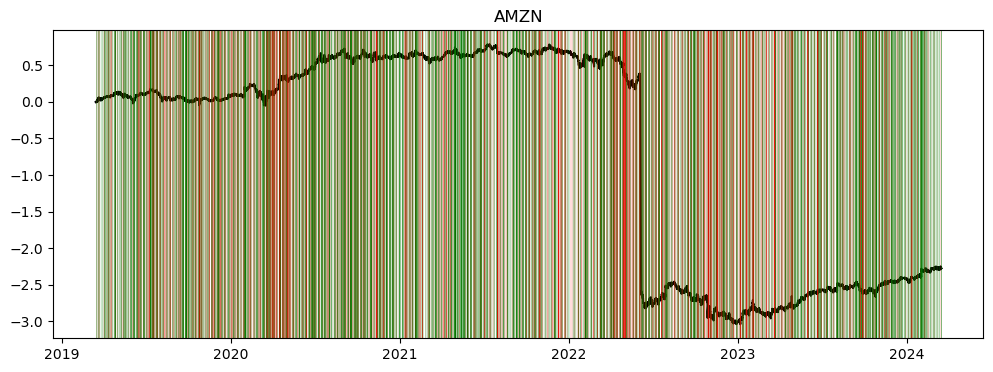

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


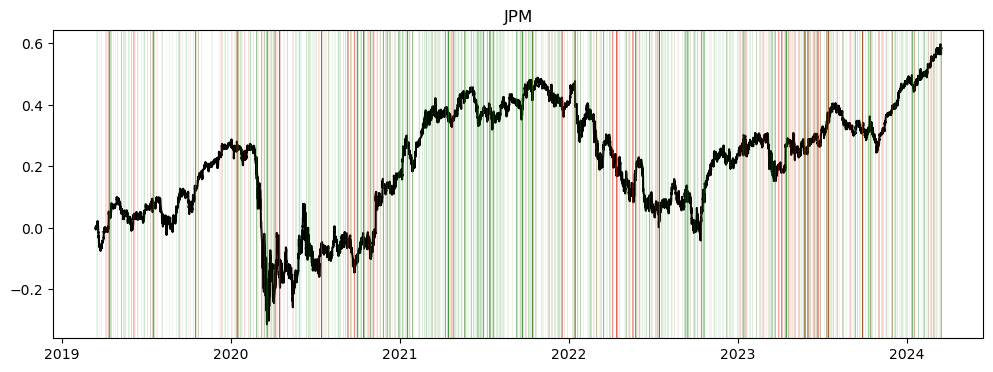

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


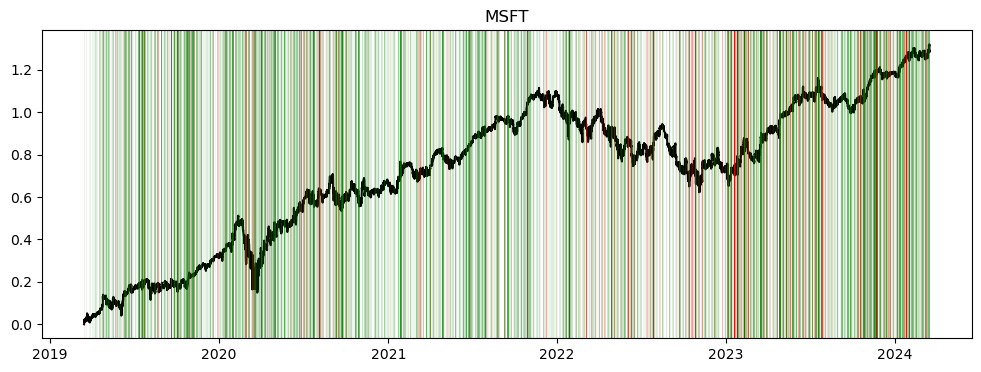

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


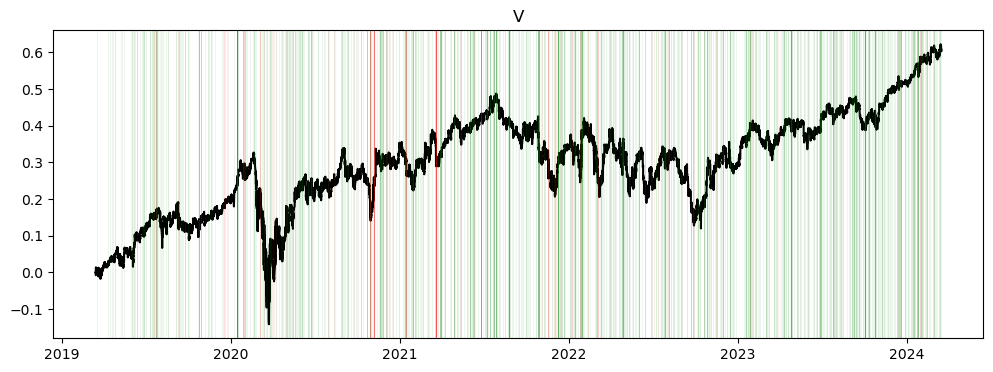

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


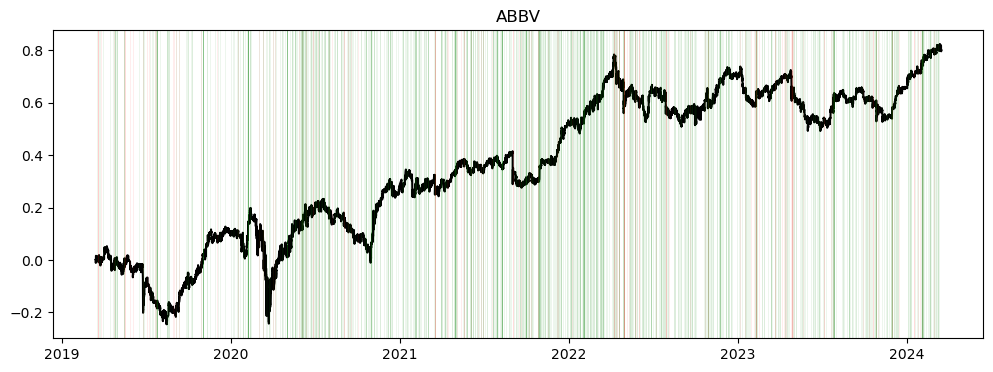

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


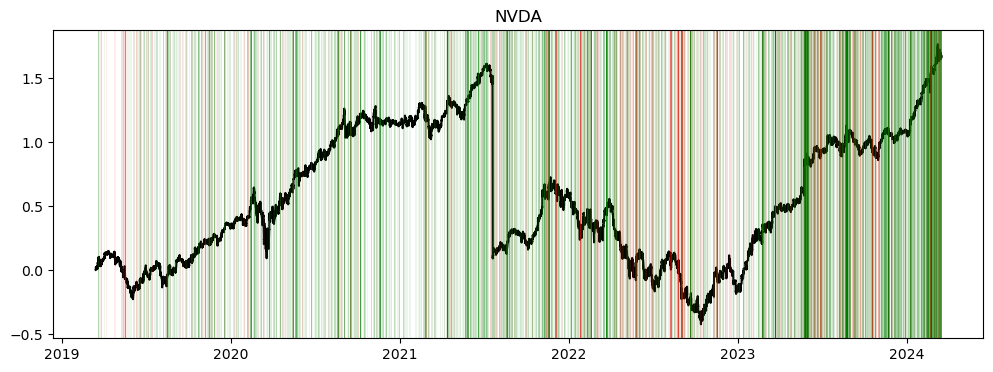

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


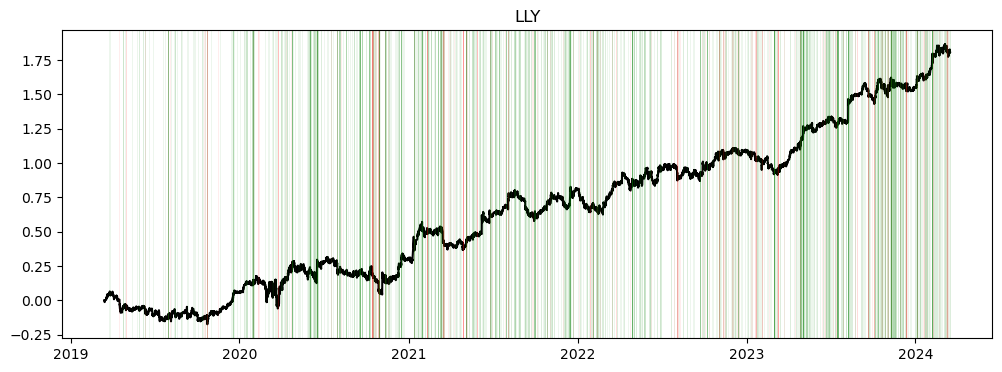

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


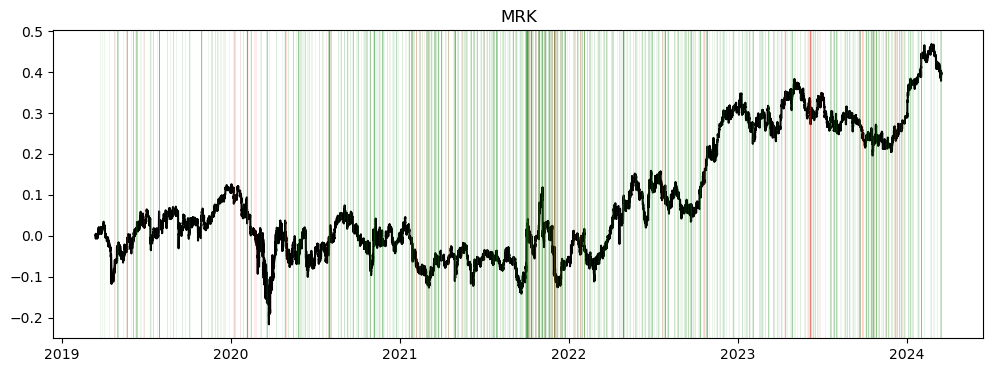

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


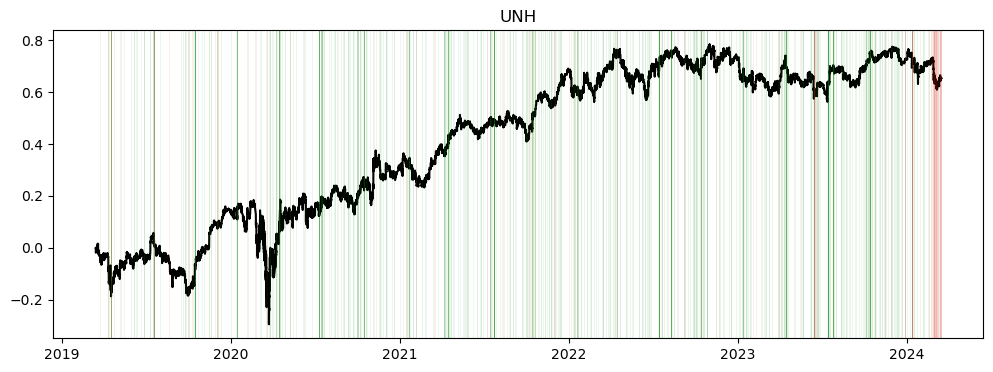

/var/folders/tg/nkrt27q937bgzsnrzszxn7bc0000gn/T/ipykernel_19873/727861151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])


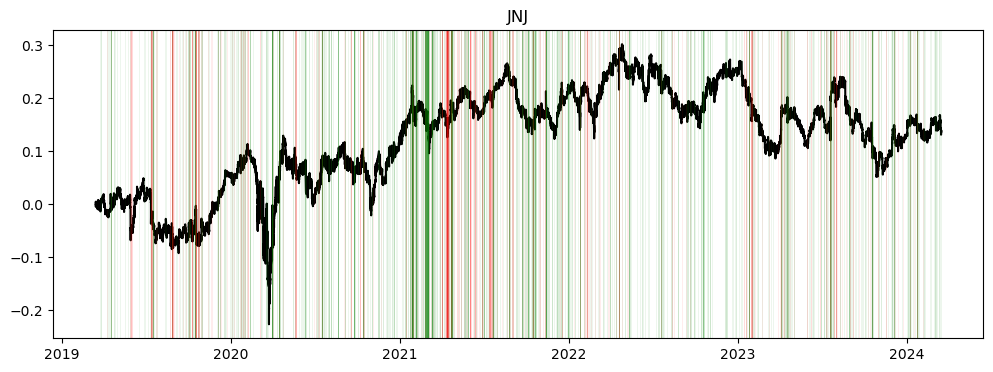

In [40]:
for tick in tickers:
    market = pd.read_csv('../prebuilt_rob_data/'+tick+'_prerob.csv')[['stock_time', 'close']]
    market = market[market['stock_time'].notna()]
    market['stock_time'] = pd.to_datetime(market['stock_time'])
    openai_ticker = openai[openai['Ticker'] == tick]
    openai_ticker['Publishing Time'] = pd.to_datetime(openai_ticker['Publishing Time'])
    fig,ax = plt.subplots(figsize=(12,4))
    ax.plot(market['stock_time'],np.log(market['close'] / market['close'].iloc[0]), color = 'black')
    for index, row in openai_ticker.iterrows():
        if row['openai_sentiment'] == -1:
            ax.axvline(row['Publishing Time'],color='r',linewidth=0.5, alpha = .1)
        if row['openai_sentiment'] == 1:
            ax.axvline(row['Publishing Time'],color='g',linewidth=0.5, alpha=.1)
        # if row['openai_sentiment'] == 0:
        #     ax.axvline(row['Publishing Time'],color='blue',linewidth=0.5,alpha=.1)
    ax.set_title(f'{tick}')

    plt.show()

notable is the lack of blue from neutral scores in higher profile stocks (e.g. Google, Apple, Amazon). This is consistent with expectations, and from a first glance seems to reveal the patterns better. It could be that a 'neutral' article is still positive for stock growth just because of the increased 'exposure' compared to the absence of an article. 

Might want to ask how we can pool the sentiment better. 

One thought is to see how the sentiment is to look at the sum of the sentiment (+1, -1, 0) divided by the total number of articles over a certain timespan. We can also try a weighted version, but finding appropriate weights might require another ML program. 

## Stock Splits

AAPL, NVDA, AMZN, GOOGL all have stock splits. Let's deterimine where

AAPL: 4:1 on 8/31/2020
NVDA: 4:1 on 7/20/2021
AMZN 20:1 on 6/6/2022
GOOGL: 20:1 on 7/18/2022

In [27]:
AAPL_stock = pd.read_csv('../prebuilt_rob_data/AAPL_prerob.csv')[['stock_time', 'close']]
AAPL_stock['stock_time'] = pd.to_datetime(AAPL_stock['stock_time'])

In [28]:
AAPL_stock[AAPL_stock['stock_time'] > '2020-08-31']

,stock_time,close
22857,2020-08-31 08:00:00+00:00,126.11
22858,2020-08-31 08:00:00+00:00,126.11
22859,2020-08-31 08:00:00+00:00,126.11
22860,2020-08-31 08:15:00+00:00,126.60
22861,2020-08-31 08:30:00+00:00,126.80
...,...,...
78861,2024-03-15 20:45:00+00:00,172.49
78862,2024-03-15 21:00:00+00:00,172.50
78863,2024-03-15 21:15:00+00:00,172.42
78864,2024-03-15 21:30:00+00:00,172.36


In [29]:
AAPL_stock[AAPL_stock['stock_time'] < '2020-08-31'].tail()

,stock_time,close
22852,2020-08-28 21:15:00+00:00,499.98
22853,2020-08-28 21:30:00+00:00,500.40
22854,2020-08-28 21:30:00+00:00,500.40
22855,2020-08-28 21:45:00+00:00,501.10
22856,2020-08-28 21:45:00+00:00,501.10


In [30]:
NVDA_stock = pd.read_csv('../prebuilt_rob_data/NVDA_prerob.csv')[['stock_time', 'close']]
NVDA_stock['stock_time'] = pd.to_datetime(NVDA_stock['stock_time'])

In [32]:
NVDA_stock[NVDA_stock['stock_time']>'2021-07-20'].head()


,stock_time,close
32133,2021-07-20 08:00:00+00:00,189.30
32134,2021-07-20 08:15:00+00:00,189.25
32135,2021-07-20 08:30:00+00:00,189.50
32136,2021-07-20 08:45:00+00:00,189.49
32137,2021-07-20 09:00:00+00:00,189.40


In [33]:
NVDA_stock[NVDA_stock['stock_time']<'2021-07-20'].tail()


,stock_time,close
32128,2021-07-19 22:45:00+00:00,758.94
32129,2021-07-19 23:00:00+00:00,758.15
32130,2021-07-19 23:15:00+00:00,758.53
32131,2021-07-19 23:30:00+00:00,759.50
32132,2021-07-19 23:45:00+00:00,760.00


In [34]:
AMZN_stock = pd.read_csv('../prebuilt_rob_data/AMZN_prerob.csv')[['stock_time', 'close']]
AMZN_stock['stock_time'] = pd.to_datetime(AMZN_stock['stock_time'])

In [35]:
AMZN_stock[AMZN_stock['stock_time']>'2022-06-06'].head()

,stock_time,close
41854,2022-06-06 08:00:00+00:00,123.5
41855,2022-06-06 08:00:00+00:00,123.5
41856,2022-06-06 08:00:00+00:00,123.5
41857,2022-06-06 08:00:00+00:00,123.5
41858,2022-06-06 08:00:00+00:00,123.5


In [36]:
AMZN_stock[AMZN_stock['stock_time']<'2022-06-06'].tail()

,stock_time,close
41849,2022-06-03 20:45:00+00:00,2447.00
41850,2022-06-03 21:00:00+00:00,2450.49
41851,2022-06-03 21:15:00+00:00,2450.43
41852,2022-06-03 21:30:00+00:00,2451.89
41853,2022-06-03 21:45:00+00:00,2452.99


In [37]:
GOOGL_stock = pd.read_csv('../prebuilt_rob_data/GOOGL_prerob.csv')[['stock_time', 'close']]
GOOGL_stock['stock_time'] = pd.to_datetime(GOOGL_stock['stock_time'])

In [38]:
GOOGL_stock[GOOGL_stock['stock_time']>'2022-07-18'].head()

,stock_time,close
32949,2022-07-18 08:00:00+00:00,112.90
32950,2022-07-18 08:00:00+00:00,112.90
32951,2022-07-18 08:15:00+00:00,113.40
32952,2022-07-18 08:30:00+00:00,113.50
32953,2022-07-18 08:45:00+00:00,113.42


In [39]:
GOOGL_stock[GOOGL_stock['stock_time']<'2022-07-18'].tail()

,stock_time,close
32944,2022-07-15 20:00:00+00:00,2235.55
32945,2022-07-15 20:15:00+00:00,2235.17
32946,2022-07-15 20:30:00+00:00,2235.50
32947,2022-07-15 20:45:00+00:00,2236.08
32948,2022-07-15 21:00:00+00:00,2235.60
